In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx


# Coffee Shop Sales
Üç NYC lokasyonundan faaliyet gösteren hayali bir kahve dükkanı olan Maven Roasters için işlem kayıtlarını, işlem tarihini, zaman damgasını ve konumu kapsayan bir veri setini içerir.

## Data Preview

* transaction_id :  Bireysel bir işlemi temsil eden benzersiz sıralı kimlik
* transaction_date : İşlemin tarihi (GG/AA/YY)
* transaction_time : İşlemin zaman damgası (SS:DD:SS)
* transaction_qty : Satılan ürün miktarı
* store_id : İşlemin gerçekleştiği kahve dükkanının benzersiz kimliği
* store_location : İşlemin gerçekleştiği kahve dükkanının konumu
* product_id : Satılan ürünün benzersiz kimliği
* unit_price : Satılan ürünün perakende fiyatı
* product_category : Ürün kategorisinin açıklaması
* product_type : Ürün tipinin açıklaması
* product_detail : Ürün detayının açıklaması

## 0. Veri Setinin Hazırlanması

**Veri Seti ve Adresi:**

Coffee Shop Sales: https://www.kaggle.com/datasets/ahmedabbas757/coffee-sales

In [2]:
# Kullanacağım kütüphaneler:

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_excel("/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx")
df = df_.copy()

In [4]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Veriye İlk Bakış

In [5]:
# Veri setinin ilk 5 gözlemi:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
# Veri setinin son 5 gözlemi:
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,NaN,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456.0,2023-06-30,20:57:19,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup


In [7]:
# Veri setinin satır ve sütun sayısı:
df.shape

(149116, 11)

In [8]:
# Veri setindeki sütunlar:
print(list(df.columns), '\n')

print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['transaction_id', 'transaction_date', 'transaction_time', 'transaction_qty', 'store_id', 'store_location', 'product_id', 'unit_price', 'product_category', 'product_type', 'product_detail'] 

Veri seti içerisinde toplam 11 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [9]:
# Veri setine ait yapısal bilgiler:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144678 non-null  float64       
 1   transaction_date  144627 non-null  datetime64[ns]
 2   transaction_time  144697 non-null  object        
 3   transaction_qty   144763 non-null  float64       
 4   store_id          144721 non-null  float64       
 5   store_location    144833 non-null  object        
 6   product_id        144657 non-null  float64       
 7   unit_price        144644 non-null  float64       
 8   product_category  144855 non-null  object        
 9   product_type      144700 non-null  object        
 10  product_detail    144614 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 12.5+ MB


In [10]:
# Veri setindeki değişkenlerin tipleri:
df.dtypes

transaction_id             float64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty            float64
store_id                   float64
store_location              object
product_id                 float64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [11]:
# Veri setinde kolon bazlı değişikler yapılacağı için veri setinde bulunan kategorik, numerik değişkenler ayrılmıştır.
categorical_features = []
numerical_features = []
date_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    elif df[col].dtype == 'datetime64[ns]':
        date_features.append(col)
    else:
        numerical_features.append(col)

In [12]:
#Veriler üzerinde daha düzenli ve sistematik bir şekilde işlem yapabilmek için List comprehension yapısı kullanılmıştır.
categorical_features = [col for col in df.columns if df[col].dtype == "object" or df[col].dtype == "categorical"]
numerical_features = [
    col for col in df.columns
    if df[col].dtype not in ["object", "category", "datetime64[ns]"]]
date_features = [col for col in df.columns if df[col].dtype == "datetime64[ns]"]
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)
print("Date Features:", date_features)

Categorical Features: ['transaction_time', 'store_location', 'product_category', 'product_type', 'product_detail']
Numerical Features: ['transaction_id', 'transaction_qty', 'store_id', 'product_id', 'unit_price']
Date Features: ['transaction_date']


In [13]:
for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144678 non-null  float64       
 1   transaction_date  144627 non-null  datetime64[ns]
 2   transaction_time  144697 non-null  category      
 3   transaction_qty   144763 non-null  float64       
 4   store_id          144721 non-null  float64       
 5   store_location    144833 non-null  category      
 6   product_id        144657 non-null  float64       
 7   unit_price        144644 non-null  float64       
 8   product_category  144855 non-null  category      
 9   product_type      144700 non-null  category      
 10  product_detail    144614 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(5)
memory usage: 8.9 MB


In [15]:
#Veri setinin betimsel istatistikleri:
numeric_stats = df[numerical_features].describe().T
date_stats = df[date_features].agg(['min', 'max', 'count']).T

print("Numerical Features Stats:")
print(numeric_stats)

print("\nDate Features Stats:")
print(date_stats)

Numerical Features Stats:
                    count          mean           std  min       25%      50%  \
transaction_id   144678.0  74752.864008  43163.024415  1.0  37340.25  74750.5   
transaction_qty  144763.0      1.438240      0.542451  1.0      1.00      1.0   
store_id         144721.0      5.343005      2.074289  3.0      3.00      5.0   
product_id       144657.0     47.909966     17.926678  1.0     33.00     47.0   
unit_price       144644.0      3.381489      2.655783  0.8      2.50      3.0   

                       75%       max  
transaction_id   112119.75  149456.0  
transaction_qty       2.00       8.0  
store_id              8.00       8.0  
product_id           60.00      87.0  
unit_price            3.75      45.0  

Date Features Stats:
                                  min                  max   count
transaction_date  2023-01-01 00:00:00  2023-06-30 00:00:00  144627


## 2. Eksik Veri Analizi

### 2.1 Eksik Verilerin Gözlemlenmesi

In [16]:
df.isna().sum()

transaction_id      4438
transaction_date    4489
transaction_time    4419
transaction_qty     4353
store_id            4395
store_location      4283
product_id          4459
unit_price          4472
product_category    4261
product_type        4416
product_detail      4502
dtype: int64

In [17]:
df.isna().sum().sum()

48487

In [18]:
#Eksik verilerin yüzde(%) olarak ne kadar olduğuna bakalım.
missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

2.956026912543986

In [19]:
#Eksik verilerin her bir sütun üzerinde yüzde(%) olrak ne kadar odluğuna bakalım.
missing_percentage = (df.isnull().sum() / len(df)) * 100

# DataFrame'e dönüştürme ve sütun isimlerini değiştirme
missing_summary = missing_percentage.reset_index()
missing_summary.columns = ['Column Name', 'Missing Percentage']

print(missing_summary)

         Column Name  Missing Percentage
0     transaction_id            2.976206
1   transaction_date            3.010408
2   transaction_time            2.963465
3    transaction_qty            2.919204
4           store_id            2.947370
5     store_location            2.872261
6         product_id            2.990289
7         unit_price            2.999007
8   product_category            2.857507
9       product_type            2.961453
10    product_detail            3.019126


In [20]:
df.notnull().sum()

transaction_id      144678
transaction_date    144627
transaction_time    144697
transaction_qty     144763
store_id            144721
store_location      144833
product_id          144657
unit_price          144644
product_category    144855
product_type        144700
product_detail      144614
dtype: int64

In [21]:
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 1591789 adet eksik olmayan, 48487 eksik gözlem var.


In [22]:
# Veri setinde en az bir gözlemi eksik olan kayıtlar:
df[df.isnull().any(axis = 1)]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
13,14.0,2023-01-01,07:48:19,1.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,NaN
15,16.0,2023-01-01,07:59:58,2.0,NaN,Lower Manhattan,47.0,3.00,Tea,NaN,Serenity Green Tea Lg
17,18.0,2023-01-01,08:00:18,1.0,8.0,NaN,42.0,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
18,19.0,2023-01-01,08:00:39,2.0,8.0,NaN,59.0,NaN,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
20,NaN,2023-01-01,08:17:27,2.0,8.0,Hell's Kitchen,NaN,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg
...,...,...,...,...,...,...,...,...,...,...,...
149091,NaN,2023-06-30,19:35:24,2.0,3.0,Astoria,41.0,4.25,Coffee,Barista Espresso,Cappuccino Lg
149094,149435.0,2023-06-30,19:40:09,2.0,5.0,Lower Manhattan,58.0,3.50,Drinking Chocolate,NaN,Dark chocolate Rg
149097,149438.0,2023-06-30,19:45:16,NaN,3.0,Astoria,41.0,4.25,Coffee,Barista Espresso,Cappuccino Lg
149108,149449.0,2023-06-30,19:57:49,1.0,3.0,Astoria,NaN,3.25,NaN,Scone,Cranberry Scone


In [23]:
# Hiç eksik gözlemi bulunmayan kayıtlar:
df[df.notnull().all(axis = 1)][:5]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


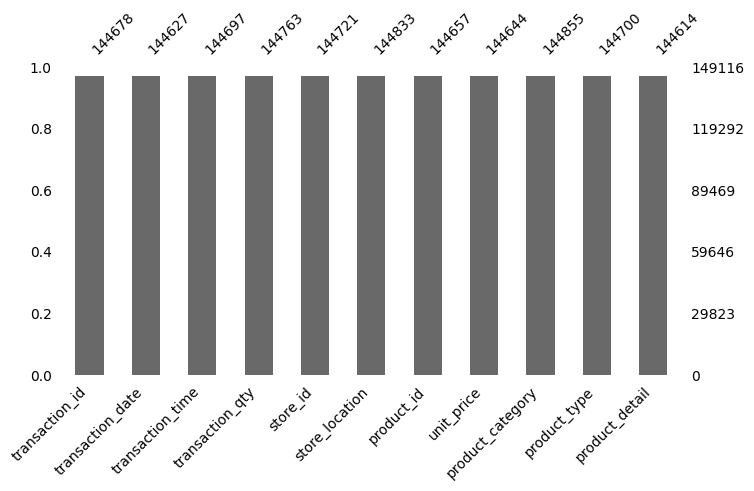

In [24]:
#!pip install missingno
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

* Veri setindeki eksik verileri görselleştirmek istenmiş ve msno.bar(df) komutu kullanılmıştır.
  
* 149,116 olması gereken veri toplamına rağmen, transaction_id sütununda 4,438 eksik veri, transaction_date sütununda 4,489 eksik veri, transaction_qty sütununda 4,353 eksik veri, store_id sütununda 4,395 eksik veri, store_location sütununda 4,283 eksik veri, product_id sütununda 4,459 eksik veri, unit_price sütununda 4,472 eksik veri, product_category sütununda 4,261 eksik veri, product_type sütununda 4,416 eksik veri ve product_detail sütununda 4,502 eksik veri bulunduğu tespit edilmiştir. Bu eksik verilerin her bir sütunda eşit olmayan bir dağılım gösterdiği ve verinin bütünlüğünü etkilediği görülmektedir.
  *  Çıkan eksik veriler birbirine çok yakın olduğu için sütun grafiğinde net bir fark gözükmemektedir.

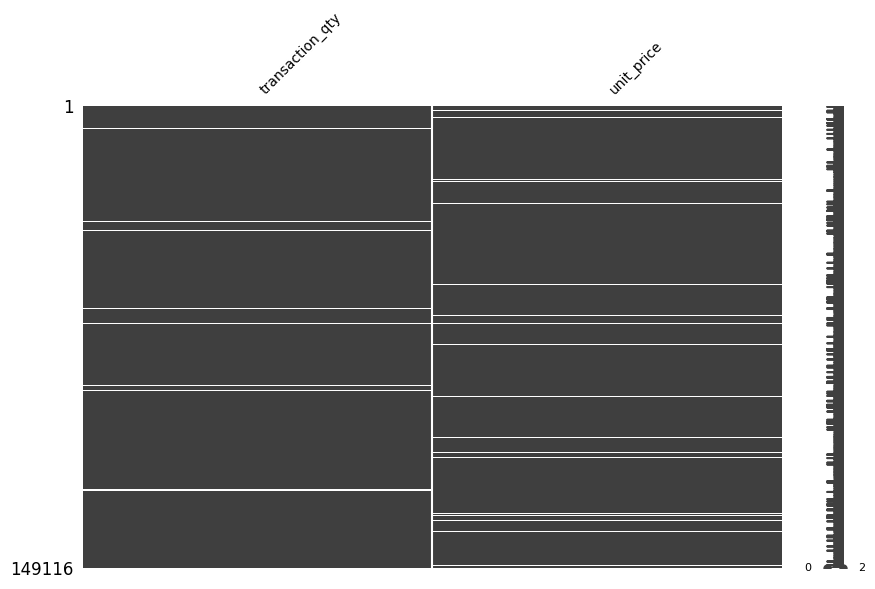

In [25]:
msno.matrix(df = df[['transaction_qty', 'unit_price']],
            figsize = (10, 6),
            fontsize = 10);

* Veri desenlerinin birbirleri ile ilişkileri olup olmadığını görselleştirmek amacıyla msno.matrix() komutu kullanılmış ve bazı eksik verilerin aynı sütunda yer aldığı görülmüş, bunun sonucunda transaction_qty yani satılan ürün miktarı ve unit_price yani satılan ürünün birim fiyatı arasında dolaylı bir ilişki olabileceği sonucuna ulaşılmıştır. 

### 2.2 Yöntem 1: Eksik Verilerin Silinmesi

In [26]:
df_clear = df.dropna(inplace=False)[:]
df_clear

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149110,149451.0,2023-06-30,20:16:31,2.0,5.0,Lower Manhattan,42.0,2.50,Tea,Brewed herbal tea,Lemon Grass Rg
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino


In [27]:
df.dropna(how = 'all')[:]

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,NaN,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino


### 2.3 Yöntem 2: Eksik Verilerin Doldurulması

In [28]:
df_fillna = df.copy()

df_fillna.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [29]:
df_fillna.isna().sum()

transaction_id      4438
transaction_date    4489
transaction_time    4419
transaction_qty     4353
store_id            4395
store_location      4283
product_id          4459
unit_price          4472
product_category    4261
product_type        4416
product_detail      4502
dtype: int64

#### 2.3.1 Sayısal Değişkenlerin Doldurulması

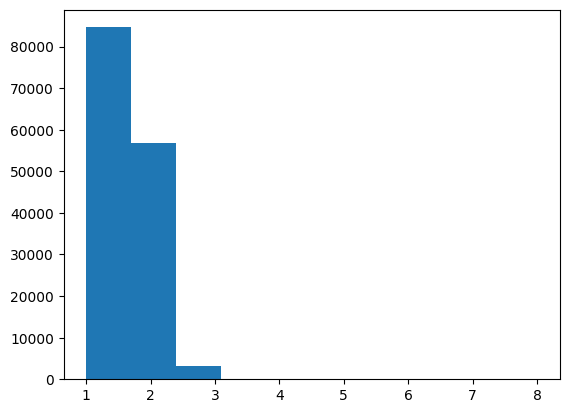

In [30]:
plt.hist(df['transaction_qty'])
plt.show()

In [31]:
df['transaction_qty'].fillna(df['transaction_qty'].median(), inplace=True)

/tmp/ipykernel_30/59666311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_qty'].fillna(df['transaction_qty'].median(), inplace=True)


* Histogram grafiğinde transaction_qty sütunun normal bir dağılıma sahip olmadığı gözlenmiş ve ortalama değerleri koruyacak olan medyan() komutu ile eksik verilerin doldurulması tercih edilmiştir. 

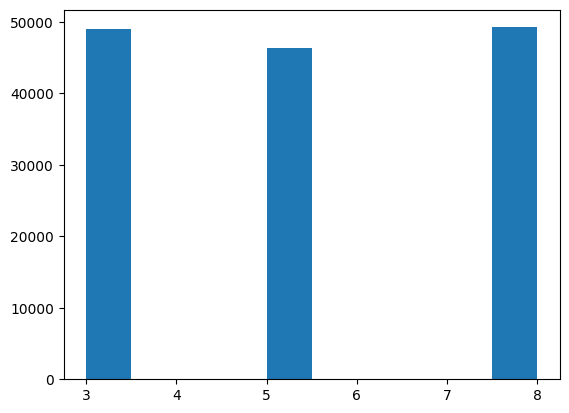

In [32]:
plt.hist(df['store_id'])
plt.show()

* Histogram grafiğinin yatay ekseni mağaza kimlik numaralarını yani store_id ve dikey eksen ise her bir aralıkta bulunan mağaza sayısının sıklığını göstermektedir. Burada 3.0	Astoria lokasyonu ile, 5.0	Lower Manhattan lokasyonu ile ve 8.0 Hell's Kitchen lokasyonu ile eşleşmektedir. Histogram grafiğinde ise bu verilerin dolduğu gözükmektedir. Bu bilgi doğrultusunda store_id veri tipini doldurma işlemi yapılmıştır.

In [33]:
df['store_id'] = df.groupby('store_location')['store_id'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


/tmp/ipykernel_30/2704622840.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['store_id'] = df.groupby('store_location')['store_id'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


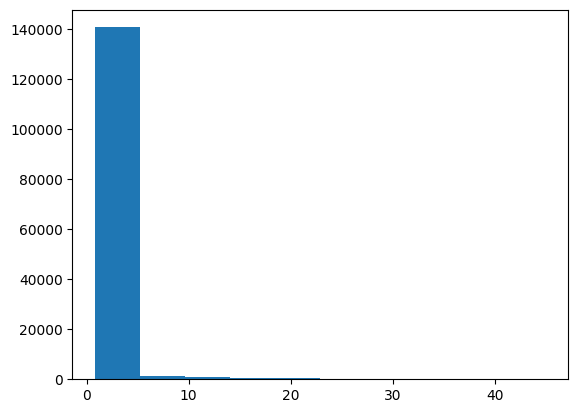

In [34]:
plt.hist(df['unit_price'])
plt.show()

In [35]:
df['unit_price'].fillna(df['unit_price'].median(), inplace=True)

/tmp/ipykernel_30/4054225831.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['unit_price'].fillna(df['unit_price'].median(), inplace=True)


* Satılan ürünün birim fiyatı olan unite_price sütunun histogram grafiği incelenmiş ve normal bir dağılım olmadığı görülmüştür. Bu nedenle medyan() komutu ile eksik verilerin doldurulmasının daha uygun olacağı düşünülmüştür.

In [36]:
nan_indices = df[df['transaction_id'].isna()].index
for i in nan_indices: df.loc[i, 'transaction_id'] = df.loc[i-1, 'transaction_id'] + 1

* transaciton_id sütununda veriler sıralı bir şekilde artmakta olduğundan mevcut eksik verilerin sırayı devam ettirek doldurulması sağlanmıştır.

In [37]:
print(df.isna().sum())

transaction_id         0
transaction_date    4489
transaction_time    4419
transaction_qty        0
store_id            4283
store_location      4283
product_id          4459
unit_price             0
product_category    4261
product_type        4416
product_detail      4502
dtype: int64


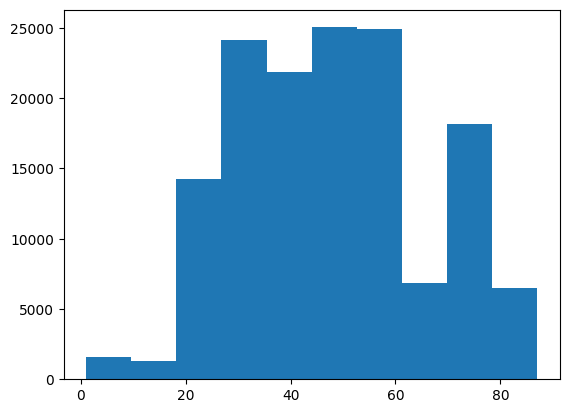

In [38]:
plt.hist(df['product_id'])
plt.show()

In [39]:
df['product_id'].fillna(df['product_id'].median(), inplace=True)

/tmp/ipykernel_30/2189568431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['product_id'].fillna(df['product_id'].median(), inplace=True)


* Satılan ürünün kimliğini ifade eden product_id sütunun histogram grafiği incelenmiş ve normal bir dağılım olmadığı görülmüştür. Bu nedenle medyan() komutu ile eksik verilerin doldurulmasına karar verilmiştir.

#### 2.3.2. Kategorik Değişkenlerin Doldurulması

In [40]:
mode_value = df['transaction_time'].mode()[0]
df['transaction_time'].fillna(mode_value, inplace=True)

/tmp/ipykernel_30/2101495249.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_time'].fillna(mode_value, inplace=True)


In [41]:
df['store_location'] = df.groupby('store_id')['store_location'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


In [42]:
df['product_category'] = df.groupby('product_id')['product_category'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


In [43]:
df['product_type'] = df.groupby('product_id')['product_type'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))


In [44]:
df['product_detail'] = df.groupby('product_id')['product_detail'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [45]:
df['transaction_date'].fillna(df['transaction_date'].mode()[0], inplace=True)


/tmp/ipykernel_30/2360251672.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['transaction_date'].fillna(df['transaction_date'].mode()[0], inplace=True)


In [46]:
df_categorical_fillna = df.copy()

df_categorical_fillna.isna().sum()

transaction_id         0
transaction_date       0
transaction_time       0
transaction_qty        0
store_id            4283
store_location      4283
product_id             0
unit_price             0
product_category       0
product_type           0
product_detail         0
dtype: int64

In [47]:
#Aynı anda NaN olan değerler gruplama işlemi ile doldurulamadığı için silinmiştir.
df = df.dropna(subset=['store_id', 'store_location'])

In [48]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

## 3. Kategorik Değişken Analizi

In [49]:
df = df_.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


### 3.1 Kategorik Değişken İşlemleri

In [50]:
df_categorical = df.select_dtypes(include = "object")
df_categorical.head(3)

,transaction_time,store_location,product_category,product_type,product_detail
0,07:06:11,Lower Manhattan,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,07:08:56,Lower Manhattan,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,07:14:04,Lower Manhattan,Drinking Chocolate,Hot chocolate,Dark chocolate Lg


In [51]:
# Kategorik bir değişkendeki benzersiz değerler:
df_categorical["product_type"].unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [52]:
# Kategorik değişkenlerdeki benzersiz değerlerin sayısı:
for col in df_categorical.columns:
    print(f'There are {df_categorical[col].nunique()} unique values in "{col}" categorical feature.\n')

There are 25762 unique values in "transaction_time" categorical feature.

There are 3 unique values in "store_location" categorical feature.

There are 9 unique values in "product_category" categorical feature.

There are 29 unique values in "product_type" categorical feature.

There are 80 unique values in "product_detail" categorical feature.



In [53]:
# Her bir kategorik değişken için toplam gözlem sayısı:
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

transaction_time
09:31:15    41
08:15:41    40
08:19:08    38
10:34:04    36
11:40:03    36
            ..
08:49:36     1
13:41:27     1
19:03:58     1
18:16:13     1
16:59:49     1
Name: count, Length: 25762, dtype: int64
 *********************************************
store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64
 *********************************************
product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64
 *********************************************
product_type
Brewed Chai tea          17183
Gourmet brewed coffee    16912
Barista Espresso         16403
Hot chocolate            11468
Brewed Black tea         11350
Brewed herbal tea        11245
Scone                    1

### 3.2 Kategorik Değişkenlerde Görselleştirme İşlemleri

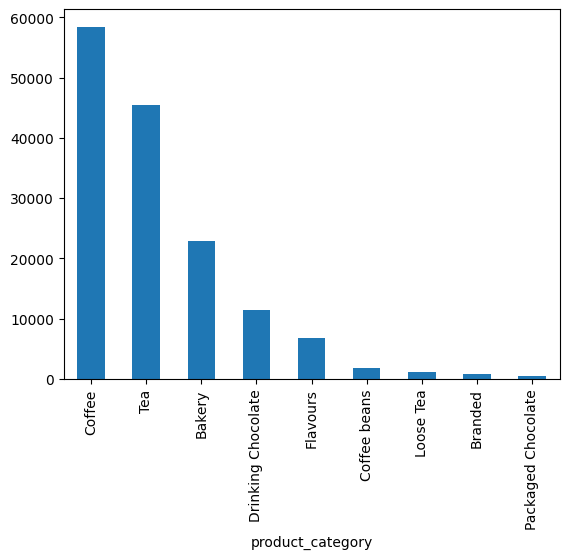

In [54]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarının görselleştirilmesi:
df['product_category'].value_counts().plot.bar();

* Hangi ürün kategorisin daha çok tercih edildiği analiz edilmiş ve en çok coffee kategoresindeki ürünlerin daha sonra tea kategorisindeki ürünlerin tercih edildiği ve en az packaged chocolate kategorisindeki ürünlerin tercih edildiği görülmüştür.

In [55]:
#Veri setindeki total geliri hesaplamak için yeni bir sütun ekleyelim.
df["total_income"] = df["transaction_qty"] * df["unit_price"]
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_income
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [56]:
df["total_income"]

0         6.00
1         6.20
2         9.00
3         2.00
4         6.20
          ... 
149111    5.00
149112    6.00
149113    3.00
149114    3.75
149115    1.60
Name: total_income, Length: 149116, dtype: float64

In [57]:
#total_income adlı oluşturduğum yeni sütunu numerical_features'a atayalım.
numerical_features.append('total_income')

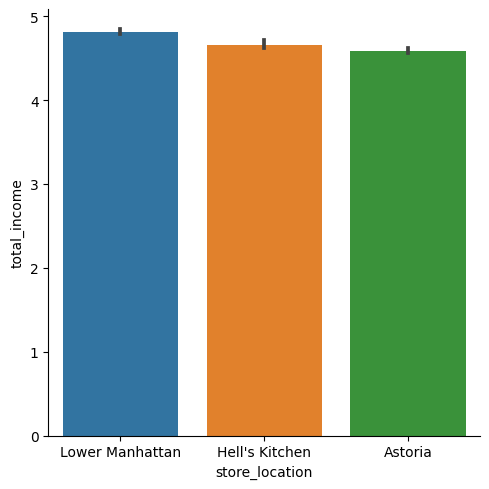

In [58]:
sns.catplot(data=df, x="store_location", y="total_income", kind="bar")

* Lower Manhattan: En yüksek toplam gelire sahip mağaza konumu. Bu, Lower Manhattan konumundaki mağazanın satış performansının diğer bölgelere göre daha iyi olduğunu gösteriyor.

* Hell's Kitchen: İkinci en yüksek toplam gelire sahip. Bu bölge de oldukça iyi performans göstermiş.

* Astoria: Üçüncü sırada yer alıyor, ancak yine de önemli bir gelir elde etmiş.
  
* Her bir sütunun temsil ettiği değerin tahmini hata aralığını belirten sütun üzerindeki çubuklar dikkate alındığında ise Lower Manhattan ve Astoria mağazalarının hata çubukları birbirine yakın olduğu, bu da bu iki mağazanın gelirlerindeki belirsizliğin benzer olduğunu göstermekteyken Hell's Kitchen hata çubuğu, gelir tahminlerinde daha fazla belirsizlik olduğunu göstermektedir.

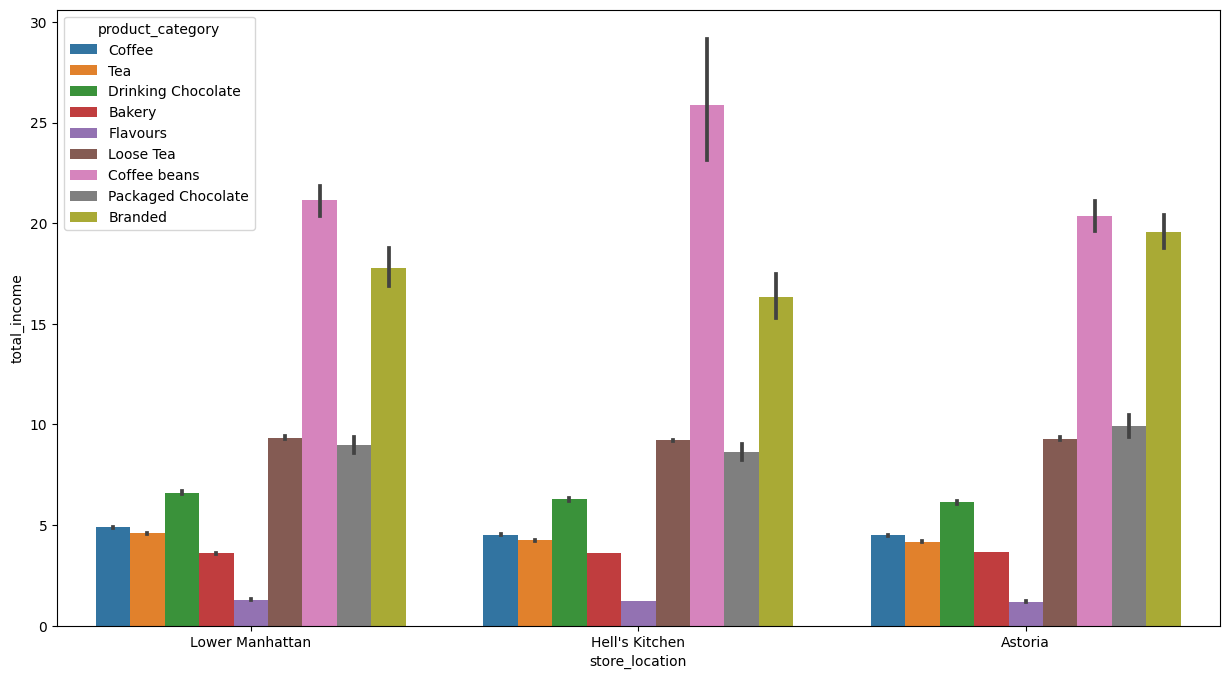

In [59]:
plt.figure(figsize = (15, 8))
sns.barplot(data = df,
            x = "store_location",
            y = "total_income",
            hue = "product_category");

* Coffee beans her üç lokasyonda da en çok geliri sağlayan kategori gibi gözüksede sütun üzerindeki çubuklar dikkate alındığında hata payının veya belirsizliğinin yüksek olduğu görülmektedir. Bu nedenle hata payı az olan Loose Tea kategorisi her üç lokayonda da eş değerde bir gelir sağladığı ve diğer Drinking Chocalate, Coffee, Tea, Bakery ve Flavours kategorilerin de bu sırayı peş peşe takip ettiği görülmektedir.

### 3.3 Kategorik Gruplama (groupby) İşlemleri

In [60]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_income
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [61]:
df_usd = df.groupby(by = "product_category")["transaction_qty"].mean().to_frame().reset_index().sort_values(by = "transaction_qty", ascending = False)

df_usd

,product_category,transaction_qty
5,Flavours,1.548012
8,Tea,1.534401
2,Coffee,1.527835
4,Drinking Chocolate,1.522236
3,Coffee beans,1.042784
1,Branded,1.038822
0,Bakery,1.018337
6,Loose Tea,1.000000
7,Packaged Chocolate,1.000000


In [62]:
df.groupby(by = ['product_category', 'store_location'])['transaction_qty'].mean().to_frame().reset_index().sort_values(by = "transaction_qty", ascending = False)[:5]

,product_category,store_location,transaction_qty
26,Tea,Lower Manhattan,1.632332
8,Coffee,Lower Manhattan,1.613656
17,Flavours,Lower Manhattan,1.607167
14,Drinking Chocolate,Lower Manhattan,1.595888
16,Flavours,Hell's Kitchen,1.517300


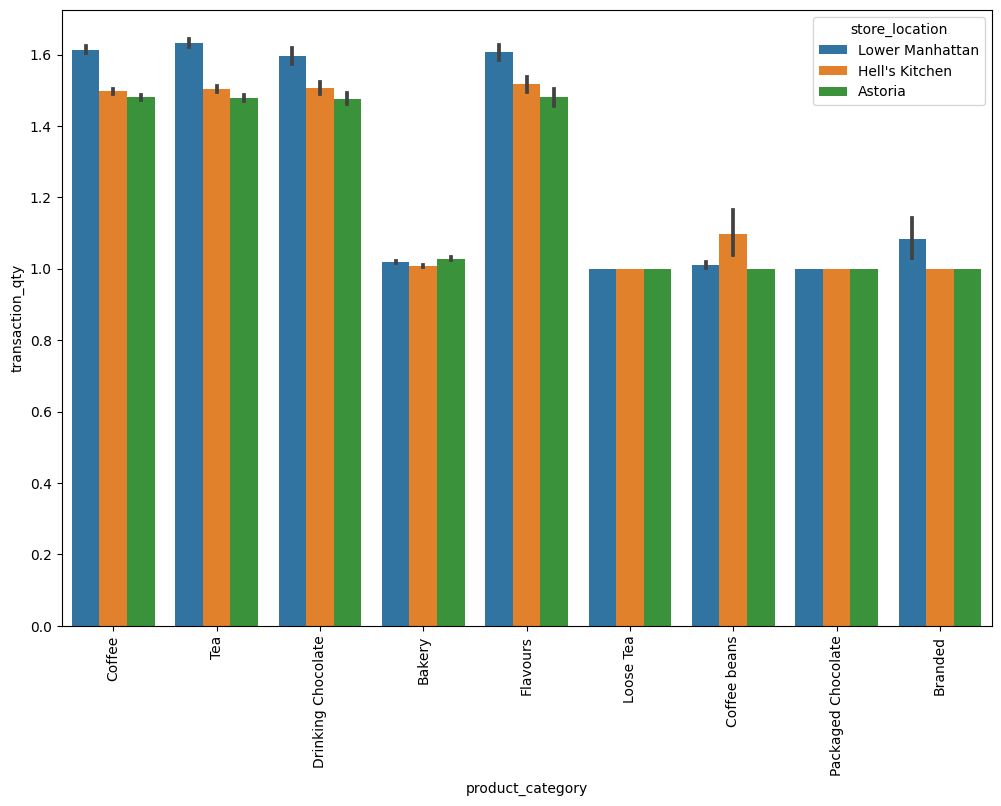

In [63]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "product_category", y = "transaction_qty", hue = "store_location");

* Tea ve Coffee kategorilerindeki satış miktarlarının hata payları dikkate alındığında bile açıkça diğer kategorilere göre yüksek olduğu görülebilir.
  
* Lower Manhattan'ın satış miktarları, tüm kategorilerde diğer iki lokasyona göre daha yüksektir.
  
* Astoria, özellikle Tea ve Coffee ürünlerinde diğer lokasyonlara göre daha düşük satış miktarına sahiptir.

In [64]:
def filter_location_product(df, location): 
    """ Veri çerçevesini belirli bir konuma ve ürün kategorisine göre filtreler ve sıralar.
    Args: 
    df (pd.DataFrame): Veri çerçevesi location 
    (str): Filtrelemek istediğim konum 
    Returns:
    pd.DataFrame: Filtrelenmiş ve sıralanmış veri çerçevesi """
    
# Grup bazlı değer sayımı:
    df_location = df.groupby(by="store_location")["product_category"].value_counts().to_frame(name='count').reset_index().sort_values(by="count", ascending=False) 
    
# Belirli konum için filtreleme:
    df_filtered = df_location[df_location['store_location'] == location] 
    
    return df_filtered 

In [65]:
location = "Hell's Kitchen" 
result = filter_location_product(df, location) 
print(result)

    store_location    product_category  count
9   Hell's Kitchen              Coffee  20187
10  Hell's Kitchen                 Tea  15277
11  Hell's Kitchen              Bakery   7617
12  Hell's Kitchen  Drinking Chocolate   3763
13  Hell's Kitchen            Flavours   2370
14  Hell's Kitchen        Coffee beans    720
15  Hell's Kitchen           Loose Tea    485
16  Hell's Kitchen  Packaged Chocolate    197
17  Hell's Kitchen             Branded    119


In [66]:
location = "Lower Manhattan" 
result = filter_location_product(df, location) 
print(result)

     store_location    product_category  count
18  Lower Manhattan              Coffee  18204
19  Lower Manhattan                 Tea  13912
20  Lower Manhattan              Bakery   7890
21  Lower Manhattan  Drinking Chocolate   3405
22  Lower Manhattan            Flavours   2930
23  Lower Manhattan        Coffee beans    531
24  Lower Manhattan           Loose Tea    381
25  Lower Manhattan             Branded    349
26  Lower Manhattan  Packaged Chocolate    180


In [67]:
location = "Astoria" 
result = filter_location_product(df, location) 
print(result)

  store_location    product_category  count
0        Astoria              Coffee  20025
1        Astoria                 Tea  16260
2        Astoria              Bakery   7289
3        Astoria  Drinking Chocolate   4300
4        Astoria            Flavours   1490
5        Astoria        Coffee beans    502
6        Astoria           Loose Tea    344
7        Astoria             Branded    279
8        Astoria  Packaged Chocolate    110


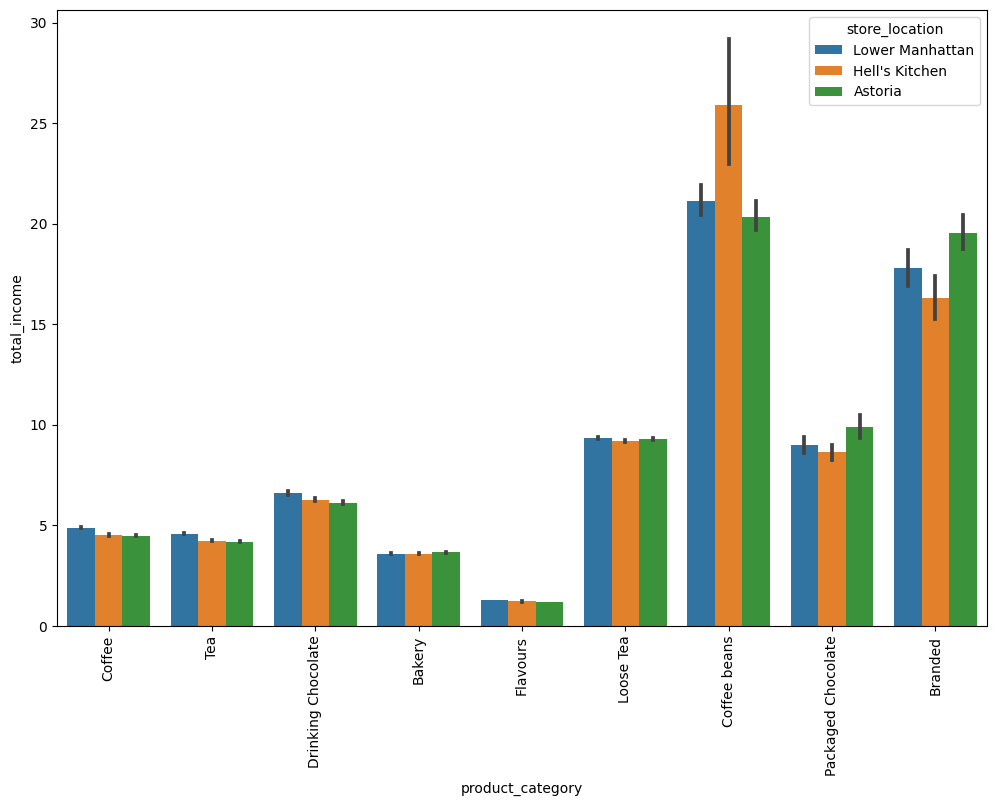

In [68]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "product_category", y = "total_income", hue = "store_location");

* Hata payları dikkate alındığında, en çok gelir elde eden mağaza Lower Manhattan olarak öne çıkmaktadır. Hell’s Kitchen ve Astoria mağazaları, genellikle benzer gelir seviyelerinde olup Lower Manhattan'ı takip etmektedir.
  
* En çok gelir getiren kategori Coffee Beans olarak öne çıkmaktadır. Branded ve Loose Tea kategorileri de gelir açısından yüksek bir performans göstermektedir

## 4. Sürekli Değişken Analizi

### 4.1 Sürekli Değişkenlerin İncelenmesi

In [69]:
#Sürekli değişkendeki benzersiz değerleri görmek için unique() kullanlıabilir. 
df["transaction_date"].unique()[:25]

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00', '2023-01-11 00:00:00', '2023-01-12 00:00:00',
 '2023-01-13 00:00:00', '2023-01-14 00:00:00', '2023-01-15 00:00:00',
 '2023-01-16 00:00:00', '2023-01-17 00:00:00', '2023-01-18 00:00:00',
 '2023-01-19 00:00:00', '2023-01-20 00:00:00', '2023-01-21 00:00:00',
 '2023-01-22 00:00:00', '2023-01-23 00:00:00', '2023-01-24 00:00:00',
 '2023-01-25 00:00:00']
Length: 25, dtype: datetime64[ns]

In [70]:
# Satışların zaman içindeki seyrini incelemek için yıl, ay ve gün sütunlarını ekleyelim.
df["year"] = df["transaction_date"].dt.year


df["month"] = df["transaction_date"].dt.month_name()


df["day"] = df["transaction_date"].dt.day_name()

In [71]:
# Eklenen yeni sütunları inceleyelim.
df["year"].unique()

array([2023], dtype=int32)

In [72]:
df["month"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [73]:
df["day"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [74]:
#Her ay için kaç tane işlem olduğuna bakalım.
transactions_per_month = df['month'].value_counts()
transactions_per_month

month
June        35352
May         33527
April       25335
March       21229
January     17314
February    16359
Name: count, dtype: int64

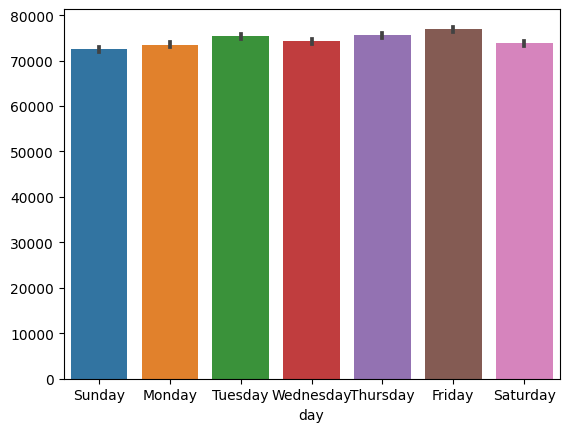

In [75]:
sns.barplot(data = df,
            x = "day", 
            y = df.day.index);

* Haftanın yedi günü de yaklaşık aynı sıralamayı takip etmiştir.

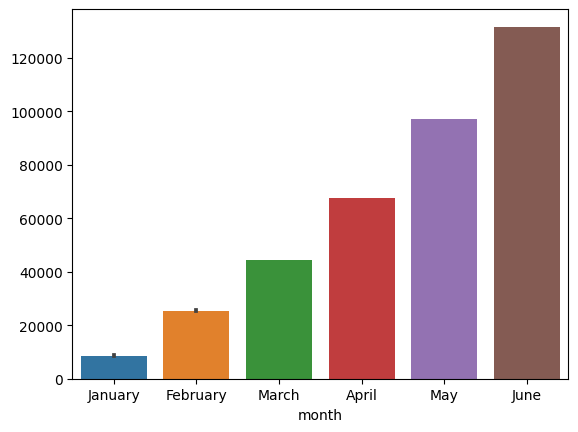

In [76]:
sns.barplot(data = df, x = "month", y = df.month.index);


* En çok satış yapılan altı ay gösterilmiştir.

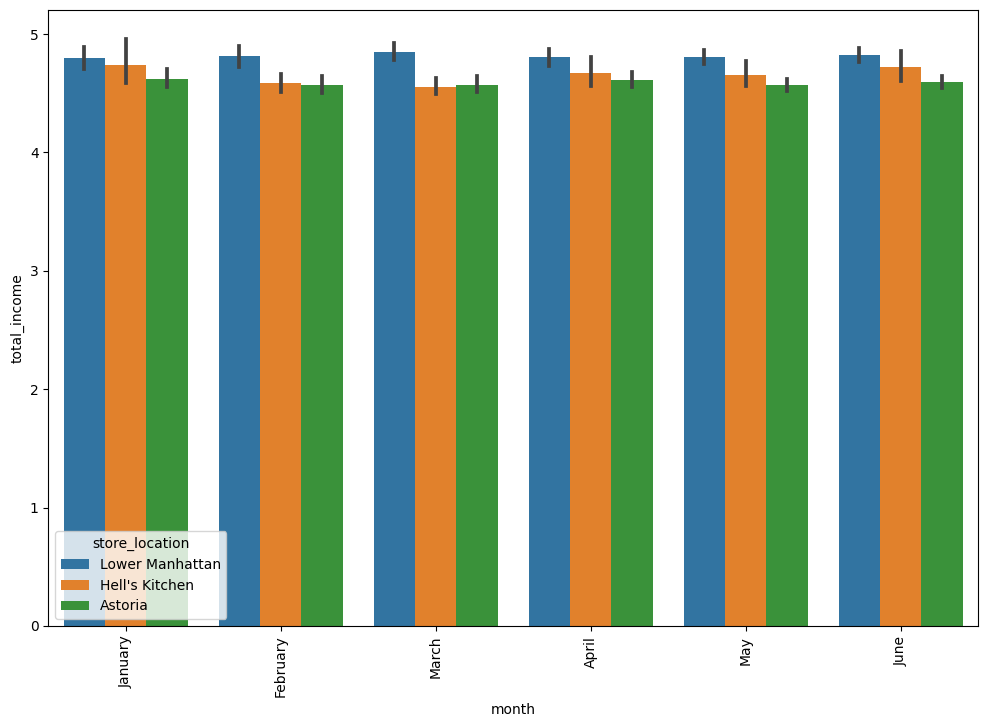

In [77]:
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = "month", y = "total_income", hue = "store_location");

* Mağazaların aylara göre elde ettiği gelir incelenmiş ve en çok Ocak, Şubat, Mart, Nisan, Mayıs ve Hazirana aylarında satış yapıldığı, en çok geliri ise Lower Manhattan lokasyonun elde ettiği görülmüştür.

In [78]:
df["hour"] = df["transaction_time"].apply(lambda x : x.hour)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


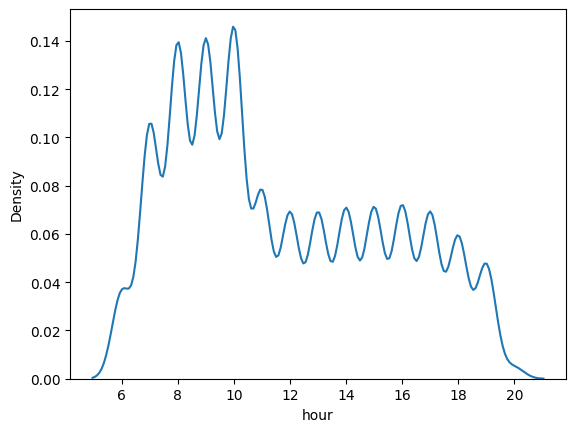

In [79]:
sns.kdeplot(df["hour"])
plt.show()

* En yüksek satışlar 8.00 ve 11.00 saat aralığında görülmektedir.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='hour', ylabel='Density'>

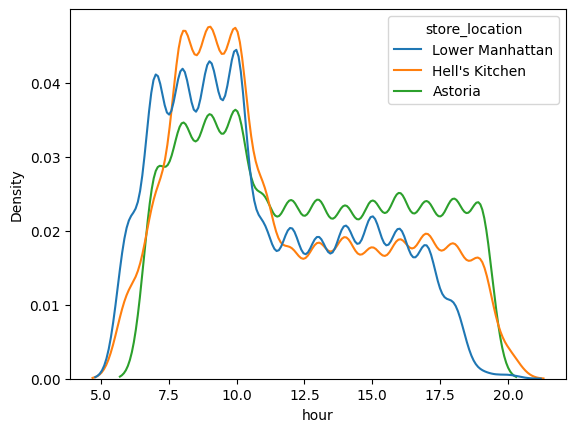

In [80]:
sns.kdeplot(data=df,x ='hour',hue='store_location')

* Mağazaların yoğunluk saatleri arasındaki ilişki incelenmiş ve saatte göre değişimlerin her üç mağazanın da benzer olduğu görülmüştür.
  
* Mağazalrını yoğunluk değişimlerine bakıldığında sabah 5.00 civarında yoğunluğun başladığı, 6.00 ile 12.00 arasında zirve yaptığı ve 20.00 civarında sona erdiği görülmektedir.

* Hell's Kitchen, diğer iki mağazaya kıyasla saatlik yoğunluk bakımından daha yüksek değerlere sahiptir, özellikle sabah ve öğle saatlerinde daha belirgin bir yoğunluk gözlemlenmektedir.

In [81]:
df_numerical = df.select_dtypes(include = ["float64", "int64"])
df_numerical.head()

,transaction_id,transaction_qty,store_id,product_id,unit_price,total_income,hour
0,1,2,5,32,3.0,6.0,7
1,2,2,5,57,3.1,6.2,7
2,3,2,5,59,4.5,9.0,7
3,4,1,5,22,2.0,2.0,7
4,5,2,5,57,3.1,6.2,7


In [82]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,149116.0,74737.371872,43153.600016,1.0,37335.75,74727.50,112094.25,149456.0
transaction_qty,149116.0,1.438276,0.542509,1.0,1.00,1.00,2.00,8.0
store_id,149116.0,5.342063,2.074241,3.0,3.00,5.00,8.00,8.0
product_id,149116.0,47.918607,17.930020,1.0,33.00,47.00,60.00,87.0
unit_price,149116.0,3.382219,2.658723,0.8,2.50,3.00,3.75,45.0
total_income,149116.0,4.686367,4.227099,0.8,3.00,3.75,6.00,360.0
hour,149116.0,11.735790,3.764662,6.0,9.00,11.00,15.00,20.0


In [83]:
# Bir veri setindeki numerik kolonların istatistiksel bilgilerine erişmek için basitçe bu tarz bir fonksiyon yazabiliriz.

def numeric_ist(dataframe: pd.DataFrame) -> None:
    """Prints statistical information for numerical columns.

    Args:
        dataframe (pd.DataFrame): DataFrame object.
    
    Return:
        None
    
    """

    num_df = dataframe.select_dtypes(include = ["float", "int"])

    for col in num_df.columns:
        print(f"**********{col}**********")
        print(f"Mean value of {col} is {num_df[col].mean():.2f}")
        print(f"Std value of {col} is {num_df[col].std():.2f}")
        print(f"Max value of {col} is {num_df[col].max()}")
        print(f"Min value of {col} is {num_df[col].min()}")
        print(f"Count value of {col} is {num_df[col].count()}")
        print(f"Median value of {col} is {num_df[col].median()}\n")

In [84]:
numeric_ist(dataframe = df)

**********transaction_id**********
Mean value of transaction_id is 74737.37
Std value of transaction_id is 43153.60
Max value of transaction_id is 149456
Min value of transaction_id is 1
Count value of transaction_id is 149116
Median value of transaction_id is 74727.5

**********transaction_qty**********
Mean value of transaction_qty is 1.44
Std value of transaction_qty is 0.54
Max value of transaction_qty is 8
Min value of transaction_qty is 1
Count value of transaction_qty is 149116
Median value of transaction_qty is 1.0

**********store_id**********
Mean value of store_id is 5.34
Std value of store_id is 2.07
Max value of store_id is 8
Min value of store_id is 3
Count value of store_id is 149116
Median value of store_id is 5.0

**********product_id**********
Mean value of product_id is 47.92
Std value of product_id is 17.93
Max value of product_id is 87
Min value of product_id is 1
Count value of product_id is 149116
Median value of product_id is 47.0

**********unit_price**********

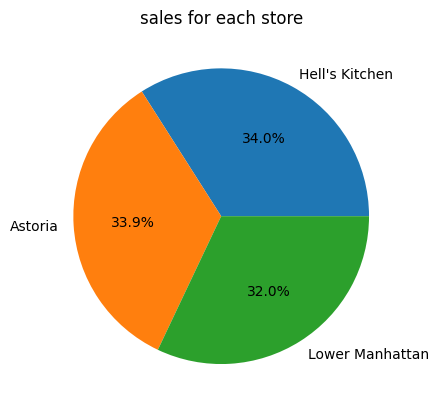

In [85]:
plt.pie(df['store_location'].value_counts(), labels =['Hell\'s Kitchen', 'Astoria', 'Lower Manhattan'], autopct='%1.1f%%')
plt.title('sales for each store')
plt.show()

* Her bir mağazanın satış dağılımı incelenmiş, üç mağazanın da benzer oranlara sahip olduğu ancak 34.0 ile en çok Hell's Kitchen mağazası olurken en az 32.0 ile Lower Manhattan mağazası yer aldığı görülmüştür.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

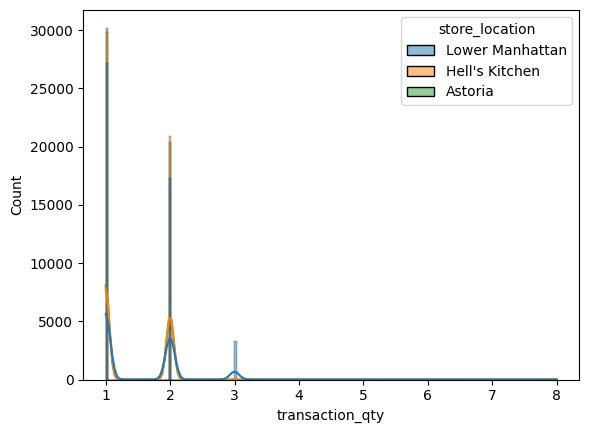

In [86]:
# Numerik bir kolonun dağılımını görmek için histogram kullanırız.
sns.histplot(data = df,
             x = "transaction_qty",
             kde = True, 
             hue = "store_location");

* Lower Manhattan: Bu konum, diğerlerine göre en yüksek işlem sayısına sahip gibi görünmektedir. Bu, Lower Manhattan'daki mağazaların daha fazla müşteri çektiğini veya daha fazla işlem gerçekleştirdiğini gösterebilir.

* Hell's Kitchen: Bu konum, Lower Manhattan'dan sonra ikinci en yüksek işlem sayısına sahip. Bu da bu bölgedeki mağazaların da oldukça aktif olduğunu gösterir.

* Astoria: En düşük işlem sayısına sahip konumdur. Bu, Astoria'daki mağazaların diğer iki bölgeye göre daha az işlem gerçekleştirdiğini gösterir.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


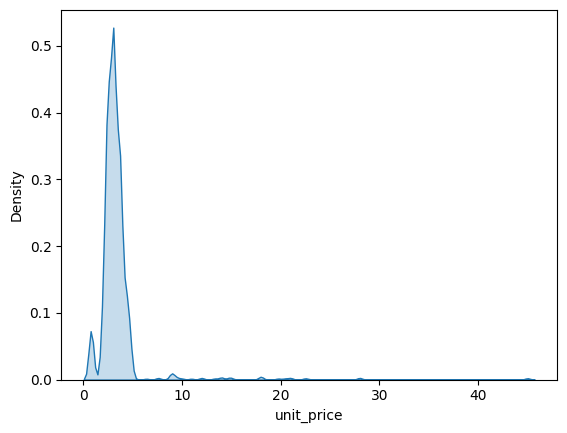

In [87]:
# kdeplot ise ilgili numerik değişkenin yoğunluğunu gösterir.
sns.kdeplot(df['unit_price'], fill = True);

* Grafiğin tepe noktasının yaklaşık 2-3 aralığında olduğu görülmektedir. Bu, birim fiyatların büyük bir kısmının düşük değerlerde yoğunlaştığını göstermektedir.
  
* Grafiğin sağ tarafında (yüksek fiyat değerlerinde) uzun bir kuyruk bulunmkatadır. Bu, bazı ürünlerin birim fiyatlarının çok yüksek olduğunu, ancak bu fiyatların daha nadir görüldüğünü ifade etmektedir. Bunun yanında 40'ın üzerindeki birim fiyatların çok nadir olduğunu ve potansiyel olarak outlier (uç değer) olabileceğini göstermektedir.
  
* Özetle, grafik asimetrik bir dağılım göstermekte ve düşük fiyatlar yoğunluk olarak baskınken, yüksek fiyatlar nadiren görülmektedir.

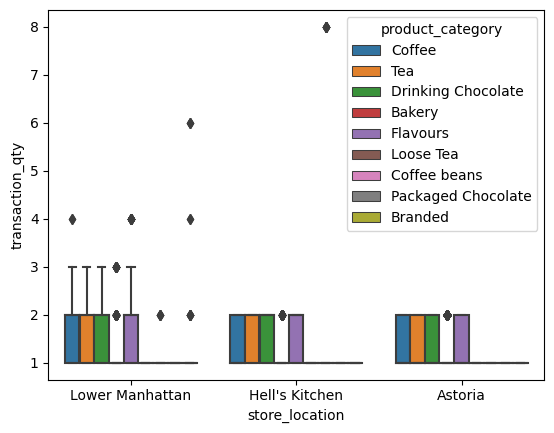

In [88]:
# Farklı mağazalardaki çeşitli ürün kategorilerinin satış miktarlarına karşılaştırılmalı olarak bakalım.
sns.boxplot(data = df,
            x = "store_location",
            y = "transaction_qty",
            hue = "product_category");

* Mağazalar arasında satış miktarlarında önemli farklılıklar olduğu görülmektedir.
  
1. Lower Manhattan:

* Çeşitli ürün kategorilerinde işlem miktarlarının geniş bir dağılımı olduğu gözlemlenmektedir.

* Özellikle Coffee satışlarında diğer mağazalara göre daha başarılı görünüyor.

2. Hell's Kitchen:

* Hell's Kitchen diğer iki mağazaya kıyasla daha yüksek oranda bir satış işlemi gerçekleştirmiştir.

3. Astoria:

* Astoria, diğer konumlara göre daha düşük işlem miktarlarına sahip olduğu görülmektedir.

* Sonuç olarak, Lower Manhattan, en çeşitli işlem miktarına sahip olduğu, Hell's Kitchen, belirli ürün kategorilerinde yoğunlaştığı ve daha tutarlı işlem miktarlarına sahip olduğu, Astoria'nın ise, genel olarak daha düşük işlem miktarlarına sahip olduğu görülmektedir.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


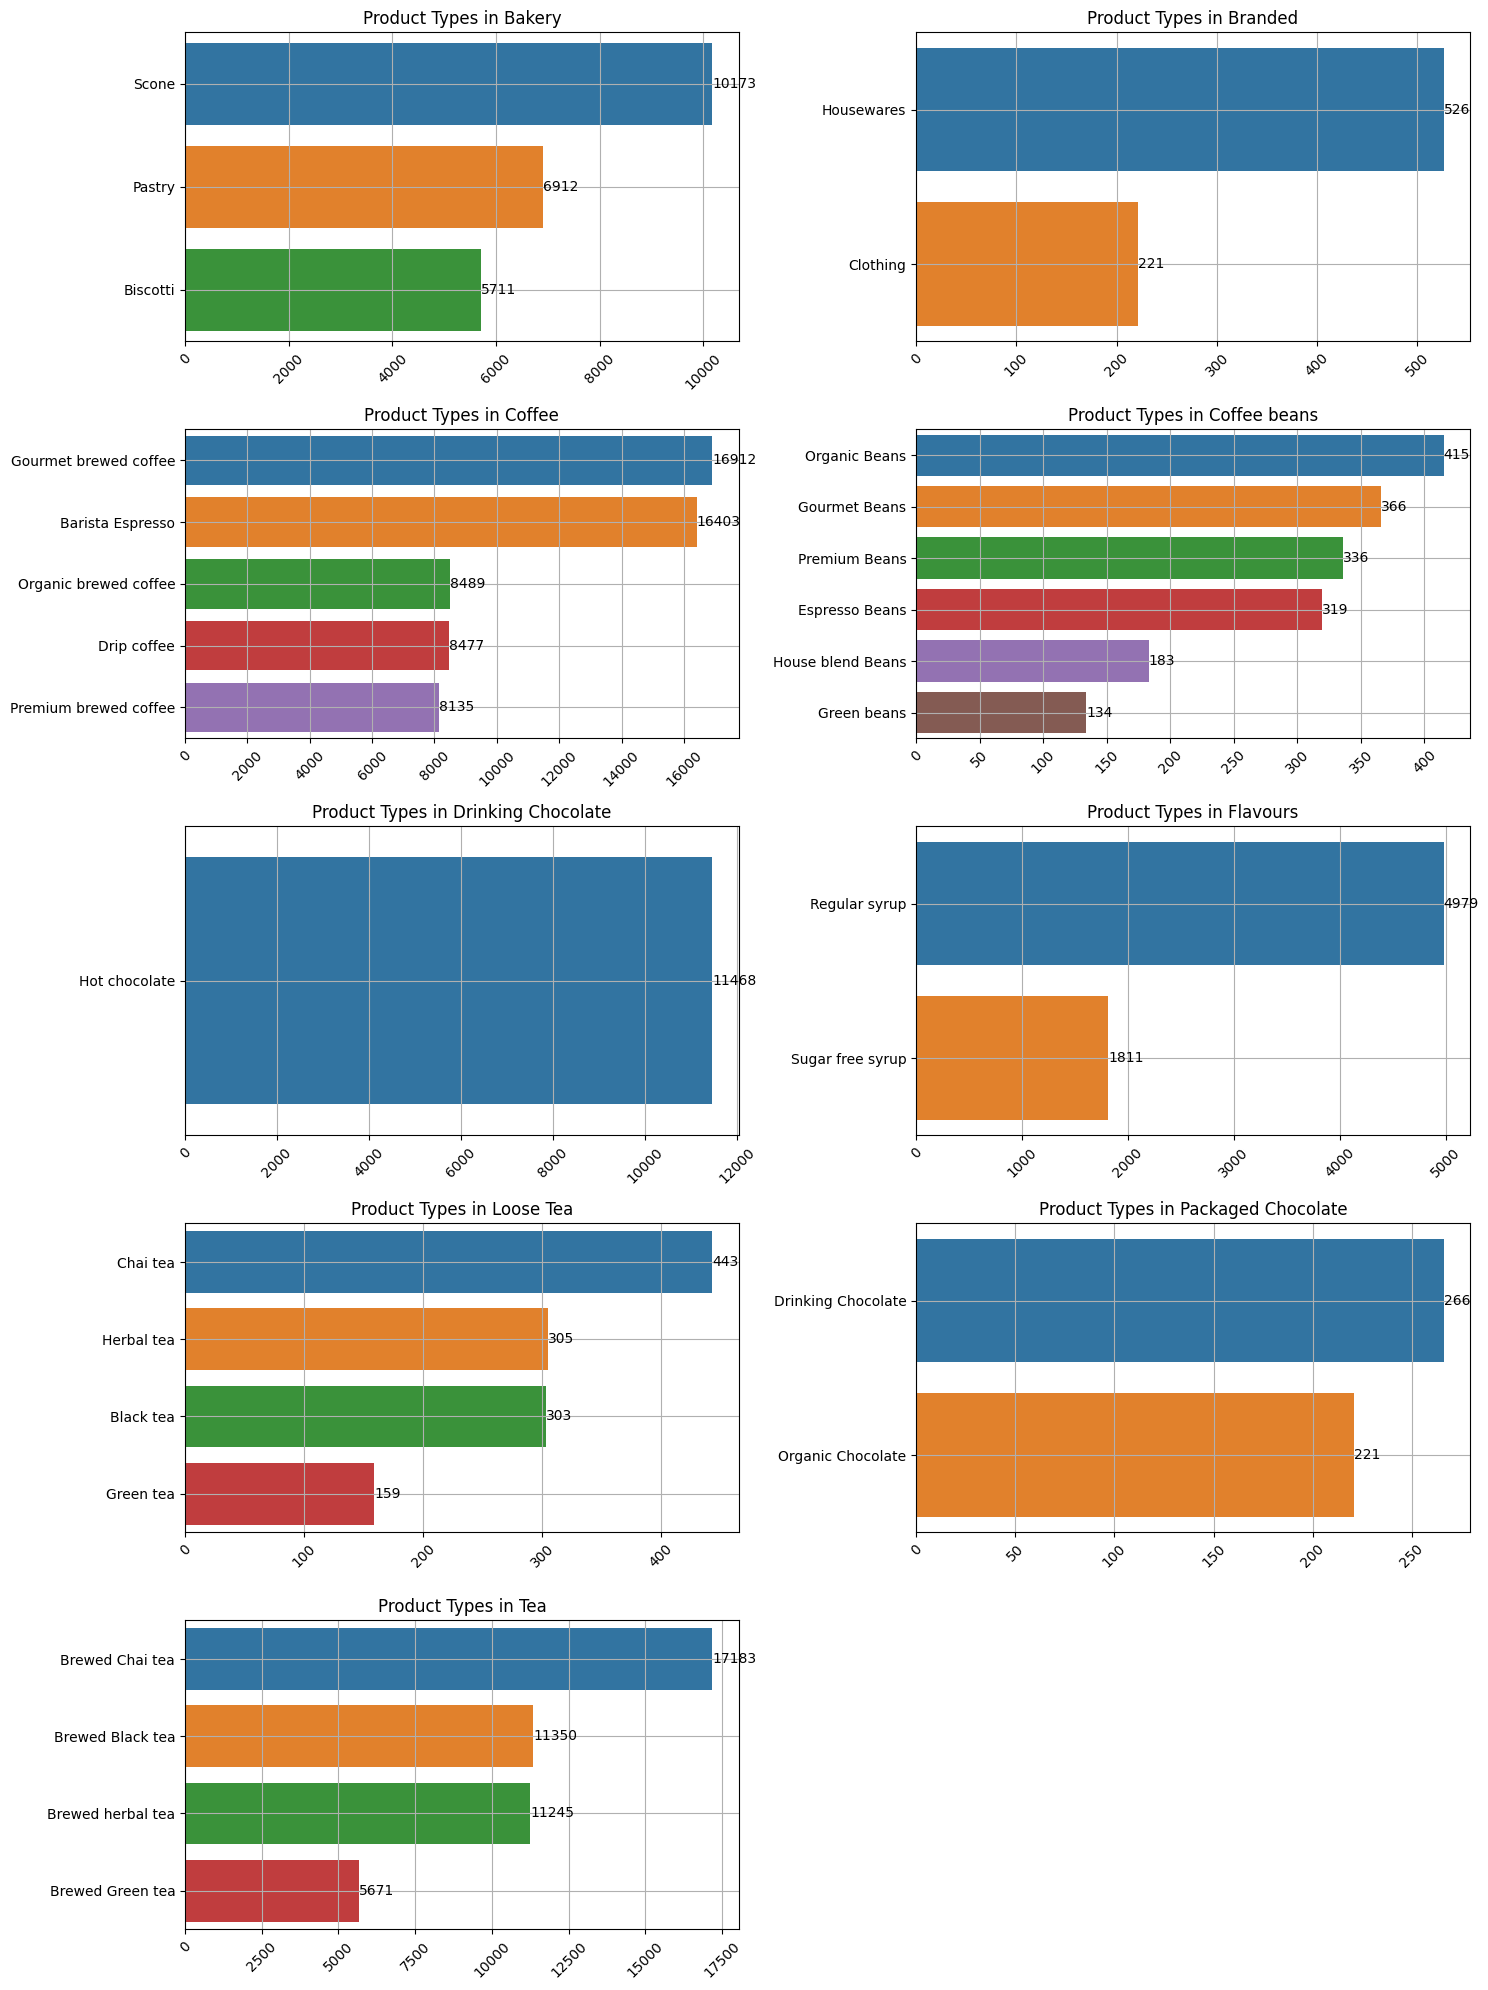

In [89]:
# Assuming 'counts' is the DataFrame obtained from your groupby operation
counts = df.groupby(["product_category", "product_type"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['product_category'].unique()

# Create subplots for each category in a 4x2 grid
fig, axes = plt.subplots(5, 2, figsize = (15, 20))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['product_category'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'product_type', data = subset, ax = axes[i], order = subset['product_type'])
    axes[i].set_title(f'Product Types in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


* Hangi ürün tiplerinin daha çok tercih edildiği incelenmiştir.
  
  1. Bakery kategorisinde en çok Scone,
  2. Branded kategorisinde en çok Housewares,
  3. Coffee kategorisinde en çok Gourmet Brewed Coffee,
  4. Coffee Beans kategorisinde en çok Organic Beans,
  5. Drinking Chocolate kategorisinde tek ürün olup Hot Chocolate,
  6. Flavours kategorisinde en çok Regular Syrup,
  7. Loose Tea kategorisinde en çok Chai Tea,
  8. Packaged Chocolate kategorisinde en çok Drinking Chocolate,
  9. Tea kategorisinde ise en çok Brewed Chai Tea tercih edilmiştir.

## 5. Aykırı Değer Analizi (Outliers)


In [90]:
df = df_.copy()

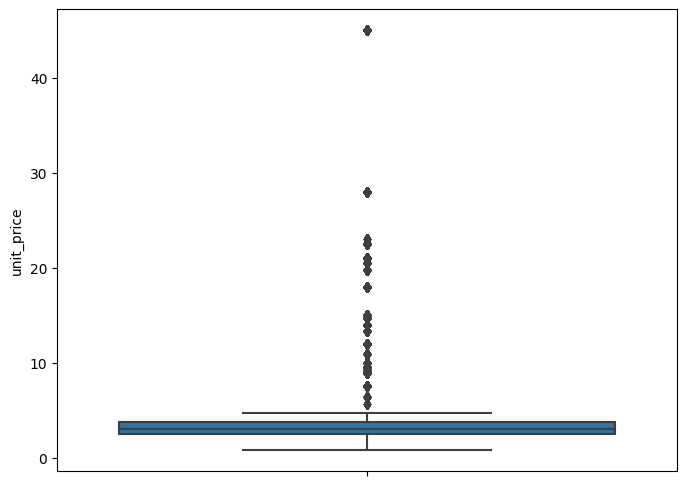

In [91]:
# Bir değişkendeki IQR'a göre aykırı gözlemleri boxplot kullanarak görselleştirelim.
plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["unit_price"],
            orient = "v");

* Grafik, unit_price (birim fiyat) verilerinin büyük kısmının yaklaşık 0 ile 5 arasında yoğunlaştığını göstermektedir.

* Grafikte bazı aykırı değerler olduğu ve bu değerlerin 40 civarına kadar uzandığı gözlemlenmektedir. Bu, bazı ürünlerin birim fiyatlarının genel fiyatlardan oldukça farklı olduğunu gösterir. Aykırı olan birim fiyatlarının premium ürünleri oluşturduğu tahmin edilmektedir.
  
* Medyan değer ile verilerin orta noktası, birim fiyatın çoğunlukla düşük seviyelerde olduğu görülmüştür.

In [92]:
df_unit_price= df['unit_price']
df_unit_price

0         3.00
1         3.10
2         4.50
3         2.00
4         3.10
          ... 
149111    2.50
149112    3.00
149113    3.00
149114    3.75
149115    0.80
Name: unit_price, Length: 149116, dtype: float64

In [93]:
# Quantile değerlerin belirlenmesi.
Q1 = df_unit_price.quantile(0.25)
Q3 = df_unit_price.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR


2.5
3.75
1.25


In [94]:
outlier_idx = df_unit_price[df_unit_price > upper_fence].index

outlier_idx

Index([  3263,   3293,   3296,   3302,   3408,   3440,   3447,   3448,   3451,
         3481,
       ...
       148739, 148771, 148784, 148796, 148816, 148927, 148985, 149017, 149064,
       149089],
      dtype='int64', length=4212)

In [95]:
df_unit_price[df_unit_price > upper_fence]

3263       8.95
3293      21.00
3296      28.00
3302      28.00
3408      28.00
          ...  
148927    19.75
148985     8.95
149017     6.40
149064    14.75
149089    18.00
Name: unit_price, Length: 4212, dtype: float64

In [96]:
q1 = df['unit_price'].quantile(0.25)
q3 = df['unit_price'].quantile(0.75)
iqr = q3-q1
outlier = (df['unit_price'] > 1.5*iqr + q3) | (df['unit_price'] < q1 - 1.5*iqr)

In [97]:
df[outlier].groupby('product_category')['unit_price'].unique()

product_category
Bakery                                                           [5.63]
Branded                                        [14.0, 28.0, 12.0, 23.0]
Coffee beans          [21.0, 28.0, 19.75, 12.0, 18.0, 10.0, 20.45, 2...
Loose Tea                                      [8.95, 9.5, 9.25, 10.95]
Packaged Chocolate                                    [6.4, 7.6, 13.33]
Name: unit_price, dtype: object

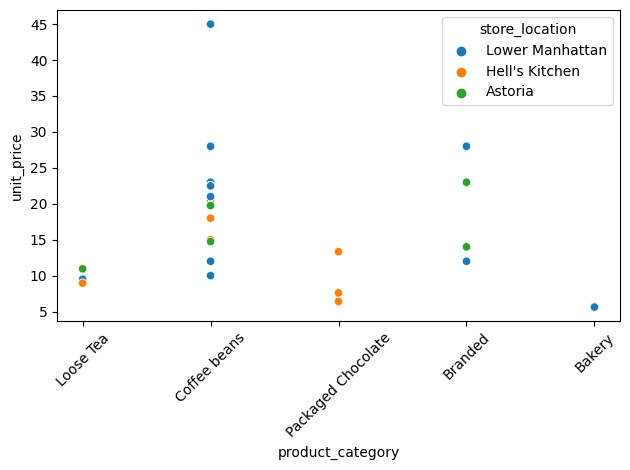

In [98]:
sns.scatterplot(data=df[outlier],x='product_category',y='unit_price',hue='store_location')
plt.xticks(rotation=45)
plt.tight_layout()

* Aykırı olan değerlerin ürün kategorilerindeki ve lokasyonlardaki dağılımına bakılmıştır.
  
* Loose Tea, Coffee Beans, Packaged Chocolate, Branded ve Bakery ürün kategorilerinde aykırı değerlerin toplandığı görülmektedir.

* En fazla aykırı değer coffee Beans kategorisindeki yoğunlaşırken en az Bakery kategorisinde gözlemlenmiştir.

* Loose Tea ve Coffee Beans kategorilerinde her üç mağazanın da aykırı değerleri bulundurduğu, Branded kategorisinde Lower Manhattan ve Astoria mağazalarnın aykırı değer bulundurduğu, Packaged Chocolate kategorisinde yalnzıca Hell's Kitchen mağazsının aykırı değer bulundurduğu ve Bakery kategorisinde ise yalnızca Lower Manhattan mağasının aykırı değer bulundurduğu görülmektedir.

#### 5.1. Baskılama Yöntemi

In [99]:
df_del = df[~(df_unit_price> upper_fence)]

df_del

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [100]:
df = df_.copy()

In [101]:
df.loc[df_unit_price > upper_fence, "unit_price"] = upper_fence

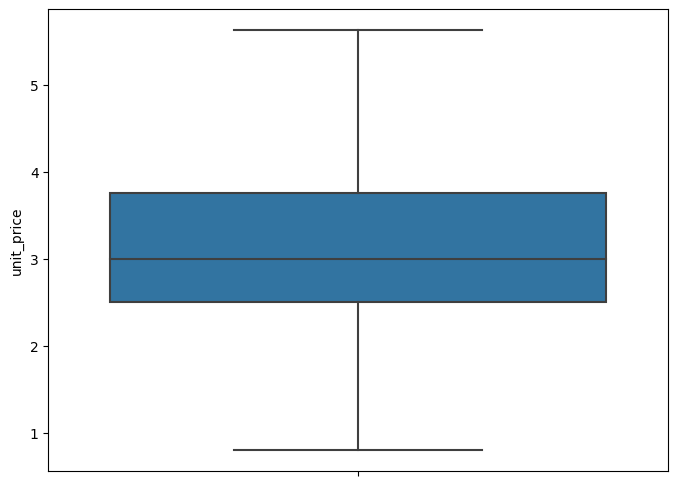

In [102]:
plt.figure(figsize = (8, 6))
sns.boxplot(data = df_del,
            y = df["unit_price"],
            orient = "v");

* Baskılama yöntemi ile aykırı değerler maksimum değere eşitlenmiş ve aykırı değerler kaldırılmıştır.

## 6. Feature Engineering

In [103]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [104]:
df["total_income"] = df["transaction_qty"] * df["unit_price"]

In [105]:
# Toplam gelire göre gelir oranı segmentasyonu:

def income_range(income):
    if income < 5.0:
        return 'Low'
    elif 5.0 <= income < 15.0:  
        return 'Medium'
    else:
        return 'High'
        
df['income_range'] = df['total_income'].apply(income_range)

df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_income,income_range
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,Medium
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Medium
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,Medium
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,Low
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,Medium


* Mağazaların elde ettiği gelir aralığı hakkında bir segmentasyon oluşturulmuş ve hangi mağazanın daha düşük, orta veya yüksek oranda gelir elde ettiği hakkında çıkarım yapılmıştır.